## Penjelsan Data Set Yang Digunakan

In [ ]:
# 1. Kasus yang diambil
# Dataset yang digunakan adalah "BBC Articles Fulltext and Category" dari Kaggle.
# Dataset ini berisi artikel berita dari situs BBC yang sudah dikategorikan
# ke dalam beberapa topik, seperti business, entertainment, politics, sport, dan tech.
# Tujuan penggunaan dataset ini adalah untuk melakukan Topic Modeling,
# yaitu mengelompokkan teks berita berdasarkan kesamaan topik yang muncul
# tanpa menggunakan label kategori secara langsung.

# 2. Penjelasan setiap kolomnya
# Kolom dalam dataset:
# - category : label kategori berita (contoh: 'business', 'politics', 'tech', dll)
# - text     : isi artikel berita dalam bentuk teks penuh

# 3. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resource tambahan NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# 4. Load data
df = pd.read_csv('bbc-text.csv')

print("Jumlah data:", len(df))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Jumlah data: 2225


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## Data Understanding

In [ ]:
# 1. Jumlah baris data
print("Jumlah data:", len(df))

Jumlah data: 2225


In [ ]:
# 2. Panjang rata-rata setiap baris (berdasarkan jumlah kata)
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
avg_length = df['text_length'].mean()
print("Panjang rata-rata setiap artikel:", round(avg_length, 2), "kata")

Panjang rata-rata setiap artikel: 390.3 kata


In [ ]:
# 3. Cek data duplikasi
duplicate_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

Jumlah data duplikat: 99


In [ ]:

if duplicate_count > 0:
    display(df[df.duplicated()].head())
else:
    print("Tidak ditemukan data duplikat.")

,category,text,text_length
85,politics,hague given up his pm ambition former conser...,289
301,politics,fox attacks blair s tory lies tony blair lie...,527
496,tech,microsoft gets the blogging bug software giant...,235
543,business,economy strong in election year uk businesse...,299
582,entertainment,ray dvd beats box office takings oscar-nominat...,212


In [ ]:
# 4. Cek data kosong
print("\nJumlah data kosong tiap kolom:")
print(df.isnull().sum())



Jumlah data kosong tiap kolom:
category       0
text           0
text_length    0
dtype: int64


/tmp/ipython-input-1684643073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='viridis')


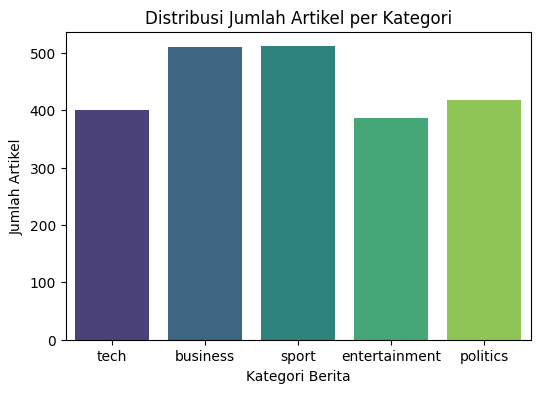

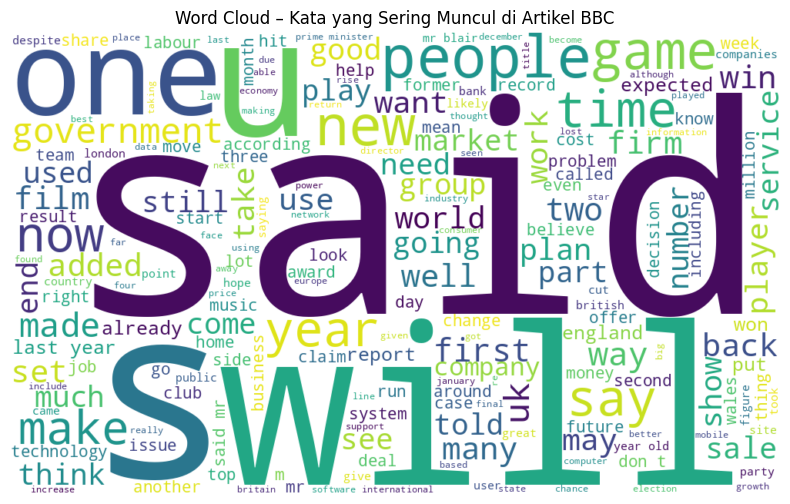

In [ ]:
# 5. Distribusi data (bar chart + word cloud)
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', palette='viridis')
plt.title("Distribusi Jumlah Artikel per Kategori")
plt.xlabel("Kategori Berita")
plt.ylabel("Jumlah Artikel")
plt.show()

# Word cloud kata yang sering muncul
all_text = " ".join(df['text'])
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Kata yang Sering Muncul di Artikel BBC")
plt.show()

# Data Text Processing

In [ ]:
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
import nltk

# resource yang dibutuhkan
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

print("Contoh hasil tokenisasi:")
print(df['tokens'].iloc[0][:20])

Contoh hasil tokenisasi:
['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high-definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into']


In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

print("\nContoh hasil lemmatization:")
print(df['lemmatized'].iloc[0][:20])


Contoh hasil lemmatization:
['tv', 'future', 'in', 'the', 'hand', 'of', 'viewer', 'with', 'home', 'theatre', 'system', 'plasma', 'high-definition', 'tv', 'and', 'digital', 'video', 'recorder', 'moving', 'into']


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

print("\nContoh hasil stemming:")
print(df['stemmed'].iloc[0][:20])


Contoh hasil stemming:
['tv', 'futur', 'in', 'the', 'hand', 'of', 'viewer', 'with', 'home', 'theatr', 'system', 'plasma', 'high-definit', 'tv', 'and', 'digit', 'video', 'record', 'move', 'into']


In [ ]:
stop_words = set(stopwords.words('english'))
df['cleaned'] = df['lemmatized'].apply(lambda tokens: [re.sub(r'[^a-z]', '', word) for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2])

print("\nContoh hasil setelah stopword removal:")
print(df['cleaned'].iloc[0][:20])


Contoh hasil setelah stopword removal:
['future', 'hand', 'viewer', 'home', 'theatre', 'system', 'plasma', 'digital', 'video', 'recorder', 'moving', 'living', 'room', 'way', 'people', 'watch', 'radically', 'different', 'five', 'year']


In [ ]:
df['normalized_text'] = df['cleaned'].apply(lambda x: ' '.join(x))

print("\nContoh hasil normalisasi teks:")
print(df['normalized_text'].iloc[0][:200])


Contoh hasil normalisasi teks:
future hand viewer home theatre system plasma digital video recorder moving living room way people watch radically different five year time according expert panel gathered annual consumer electronics 


In [ ]:
corr_matrix = df[['text_length']].corr()
print("\nMatrix korelasi panjang teks:")
print(corr_matrix)


Matrix korelasi panjang teks:
             text_length
text_length          1.0


In [ ]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['normalized_text'])

print("\nUkuran hasil vektorisasi:", X.shape)
print("Contoh fitur (kata) yang digunakan:\n", vectorizer.get_feature_names_out()[:20])


Ukuran hasil vektorisasi: (2225, 1000)
Contoh fitur (kata) yang digunakan:
 ['ability' 'able' 'access' 'according' 'account' 'accused' 'across' 'act'
 'action' 'activity' 'actor' 'actress' 'actually' 'add' 'added' 'address'
 'admitted' 'affair' 'affected' 'africa']


In [ ]:
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


Data Modelling

In [ ]:
# Data Modeling
# Model yang digunakan di sini adalah Latent Dirichlet Allocation (LDA).
# LDA adalah salah satu algoritma yang paling populer dalam Topic Modeling.
# Tujuannya adalah untuk menemukan kumpulan topik tersembunyi (latent topics)
# yang terdapat dalam sekumpulan dokumen teks tanpa menggunakan label (unsupervised learning).

# LDA mengasumsikan bahwa:
# - Setiap dokumen terdiri dari beberapa topik.
# - Setiap topik terdiri dari sekumpulan kata dengan probabilitas tertentu.
# Dari sini, model dapat mengelompokkan dokumen berdasarkan kesamaan distribusi topiknya.

# 1. Membuat representasi BoW (Bag of Words)
vectorizer = CountVectorizer(
    max_df=0.9,
    min_df=5,
    stop_words='english'
)
X = vectorizer.fit_transform(df['clean_text'])

print("Shape matriks BoW:", X.shape)

Shape matriks BoW: (2225, 9139)


In [ ]:
lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42,
    learning_method='batch'
)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topik {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("="*80)

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topik 1:
said mr labour game party england time just win election
Topik 2:
said people new mobile technology mr use games users digital
Topik 3:
said mr year government new market economy tax growth 000
Topik 4:
said film mr year best law british world court lord
Topik 5:
best music said year new film number awards band years


## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

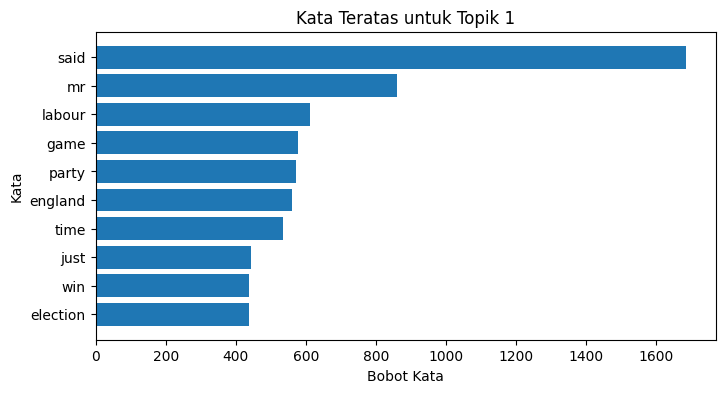

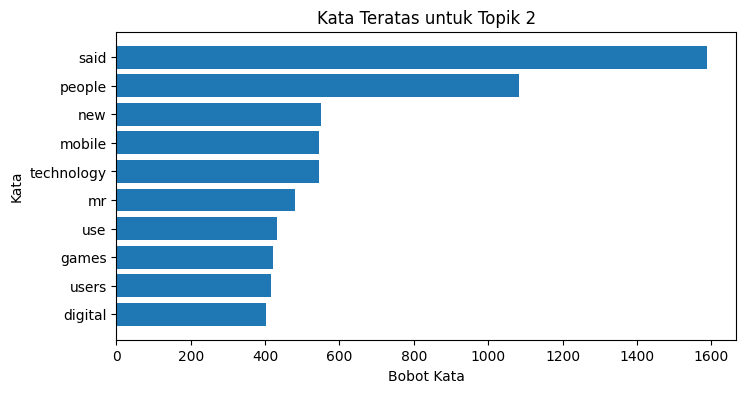

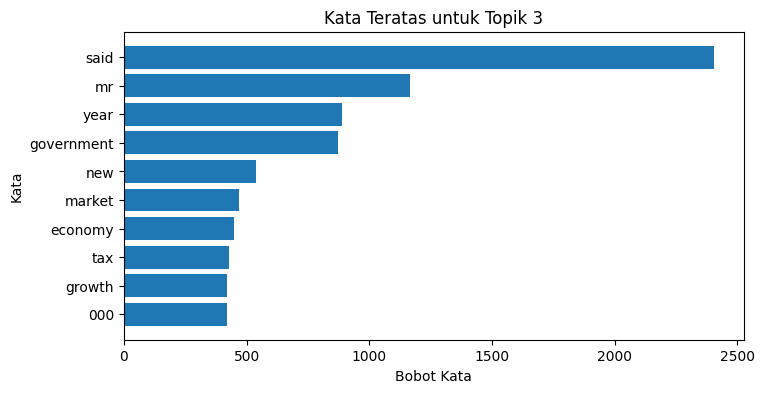

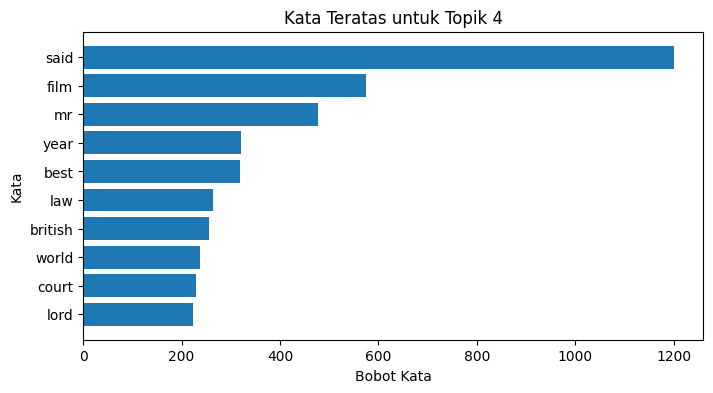

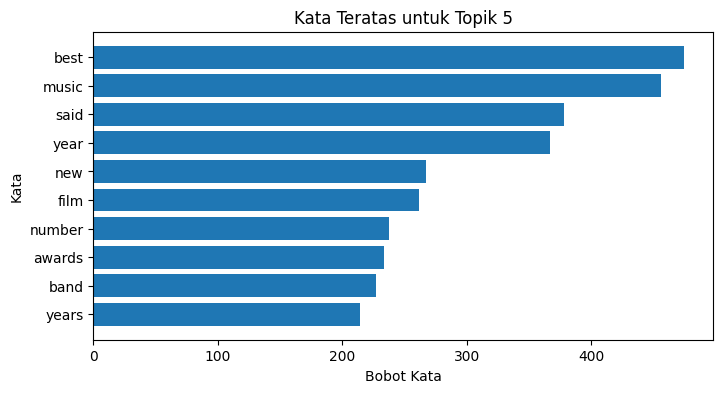

Tabel Kata Teratas Tiap Topik:


,Topic,Top Words
0,Topik 1,"said, mr, labour, game, party, england, time, ..."
1,Topik 2,"said, people, new, mobile, technology, mr, use..."
2,Topik 3,"said, mr, year, government, new, market, econo..."
3,Topik 4,"said, film, mr, year, best, law, british, worl..."
4,Topik 5,"best, music, said, year, new, film, number, aw..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()

top_n = 10

topics_data = []

for topic_idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[:-top_n - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    top_weights = topic[top_features_idx]

    topics_data.append({
        'Topic': f"Topik {topic_idx + 1}",
        'Top Words': ", ".join(top_features)
    })

    plt.figure(figsize=(8,4))
    plt.barh(top_features[::-1], top_weights[::-1])
    plt.title(f"Kata Teratas untuk Topik {topic_idx + 1}")
    plt.xlabel("Bobot Kata")
    plt.ylabel("Kata")
    plt.show()

topics_df = pd.DataFrame(topics_data)
print("Tabel Kata Teratas Tiap Topik:")
display(topics_df)


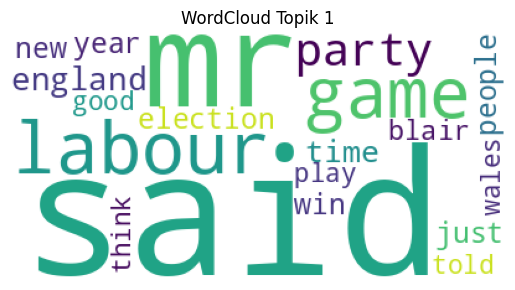

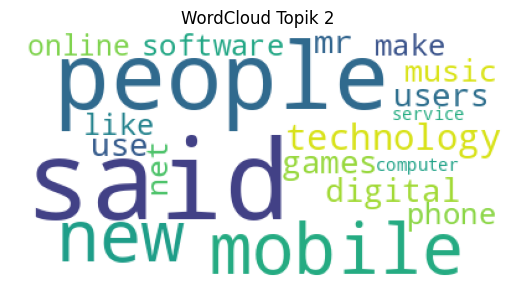

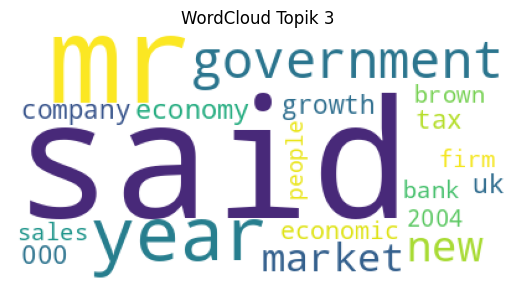

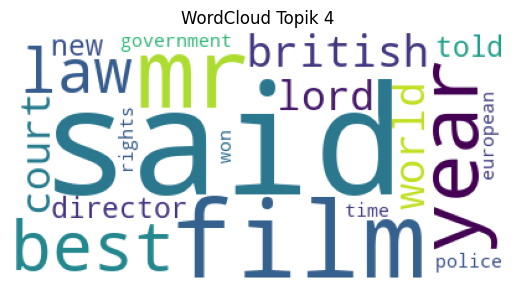

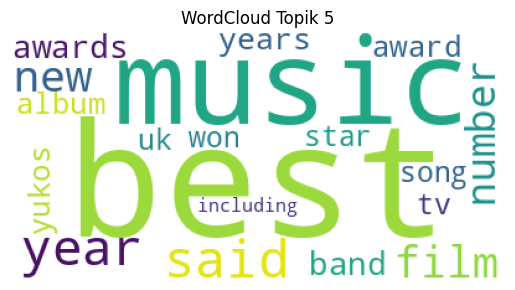

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membuat WordCloud untuk setiap topik
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(
        {feature_names[i]: topic[i] for i in topic.argsort()[:-20:-1]}
    ))
    plt.axis('off')
    plt.title(f"WordCloud Topik {topic_idx + 1}")
    plt.show()


## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

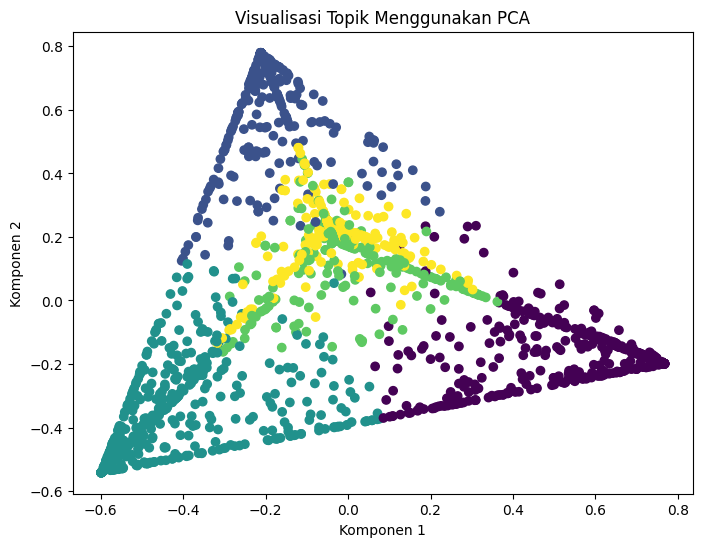

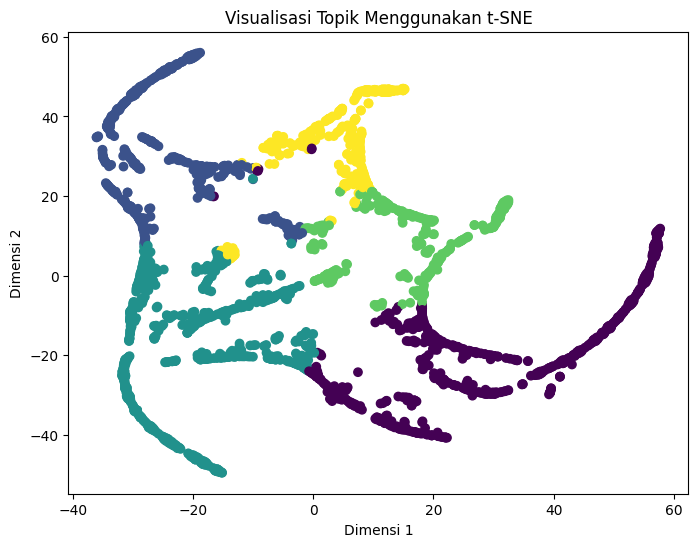

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

lda_output = lda.transform(X)


pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(lda_output)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=lda_output.argmax(axis=1), cmap='viridis')
plt.title("Visualisasi Topik Menggunakan PCA")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.show()


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(lda_output)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=lda_output.argmax(axis=1), cmap='viridis')
plt.title("Visualisasi Topik Menggunakan t-SNE")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()

In [ ]:

# 5. Kesimpulan dan Interpretasi Hasil

# Berdasarkan hasil topic modeling menggunakan Latent Dirichlet Allocation (LDA),
# data teks dari dataset BBC Articles berhasil dikelompokkan ke dalam beberapa topik utama.
# Setelah melalui tahapan text preprocessing seperti tokenisasi, stopword removal,
# stemming, dan normalisasi, model LDA mampu menemukan pola tersembunyi dari kumpulan teks.

# Hasil visualisasi dengan WordCloud dan Bar Chart menunjukkan kata-kata yang paling
# sering muncul di setiap topik. Hal ini membantu memahami tema utama dari masing-masing
# topik secara lebih intuitif.

# PCA dan t-SNE digunakan untuk memproyeksikan hasil topik ke dalam ruang dua dimensi,
# sehingga distribusi antar dokumen bisa divisualisasikan dengan warna berbeda berdasarkan topik.
# Titik-titik yang berdekatan menunjukkan kemiripan makna antar dokumen.

# Secara keseluruhan, proses topic modeling ini berhasil memberikan gambaran tematik
# dari kumpulan artikel berita BBC. Setiap topik mewakili kategori berita yang khas,
# seperti bisnis, politik, teknologi, olahraga, dan hiburan.

# Model ini bermanfaat untuk menganalisis kumpulan teks besar secara otomatis,
# mengelompokkan artikel berdasarkan isi, dan dapat digunakan sebagai dasar
# untuk analisis lanjutan seperti tren berita, klasifikasi otomatis,
# maupun pengambilan keputusan berbasis konten.